In [83]:
import numpy as np
import torch,math

In [2]:
def f(x):
    return 3*x**2-4*x
### f'x=6x-4

In [3]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h
h=1
for i in range(5):
    print(f'h = {h:.5f}, numerical_lim={numerical_lim(f,1,h)}')
    h*=0.1

h = 1.00000, numerical_lim=5.0
h = 0.10000, numerical_lim=2.3000000000000043
h = 0.01000, numerical_lim=2.029999999999976
h = 0.00100, numerical_lim=2.0029999999993104
h = 0.00010, numerical_lim=2.000299999997956


### 自动微分

In [52]:
x = torch.arange(4.0,requires_grad=True)##x=0,1,2,3
y = 2*torch.dot(x,x)##y=2x^2

In [53]:
x.grad

In [54]:
y##2*1+2*4+2*9=28

tensor(28., grad_fn=<MulBackward0>)

In [55]:
y.backward()###反向传播，即求y的偏导数，y'=4x

In [56]:
x.grad  ##x=0,1,2,3

tensor([ 0.,  4.,  8., 12.])

In [58]:
x.grad.zero_()
print(x ,x.grad)

tensor([0., 1., 2., 3.], requires_grad=True) tensor([0., 0., 0., 0.])


In [59]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [60]:
x.grad.zero_()
y=x*x ##y'=2x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [63]:
x.grad.zero_()
y= x*x
u=y.detach()#不对y求导，即视为常数C
z=u*x
print(x)

tensor([0., 1., 2., 3.], requires_grad=True)


In [64]:
z.sum().backward()#z'=x*x
x.grad

tensor([0., 1., 4., 9.])

In [65]:
print(x.grad == y, y)

tensor([True, True, True, True]) tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


In [50]:
x.grad == 2*x

tensor([ True, False,  True, False])

In [66]:
x.grad.zero_()
print(x.grad)
y.sum().backward()
x.grad == 2*x

tensor([0., 0., 0., 0.])


tensor([True, True, True, True])

In [79]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [81]:
y=torch.sin(x)
z=torch.cos(x)
print(x,y,z)
y.sum().backward()
x.grad

tensor([0., 1., 2., 3.], requires_grad=True) tensor([0.0000, 0.8415, 0.9093, 0.1411], grad_fn=<SinBackward>) tensor([ 1.0000,  0.5403, -0.4161, -0.9900], grad_fn=<CosBackward>)


tensor([ 2.0000,  1.0806, -0.8323, -1.9800])

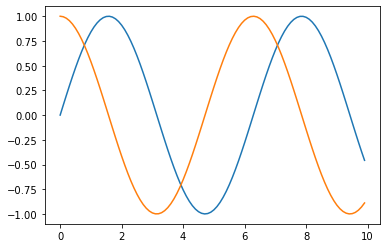

In [82]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0.0,10.0,0.1)
x.requires_grad_(True)
x1 = x.detach()
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)